In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
import dabl

In [2]:
# load data
emp_df=pd.read_csv('IBM Attrition Data.csv')
emp_df.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Unnamed: 12,Attrition
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,NaN,Yes
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,NaN,No
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,NaN,Yes
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,NaN,No
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,NaN,No


In [3]:
emp_df.isnull().sum()

Age                           0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
WorkLifeBalance               0
YearsAtCompany                0
Unnamed: 12                1470
Attrition                     0
dtype: int64

In [4]:
emp_df.drop(['Unnamed: 12'],axis=1,inplace=True)

In [5]:
emp_df.isnull().sum()

Age                        0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
Attrition                  0
dtype: int64

In [6]:
emp_df.shape

(1470, 13)

In [7]:
report=ProfileReport(emp_df)
report

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
bc=dabl.SimpleClassifier(random_state=21).fit(emp_df,target_col='Attrition')
bc

Running DummyClassifier()
accuracy: 0.839 average_precision: 0.161 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.456
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.839 average_precision: 0.161 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.456

Running GaussianNB()
accuracy: 0.205 average_precision: 0.163 roc_auc: 0.502 recall_macro: 0.490 f1_macro: 0.198
Running MultinomialNB()
accuracy: 0.848 average_precision: 0.405 roc_auc: 0.708 recall_macro: 0.575 f1_macro: 0.591
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.848 average_precision: 0.405 roc_auc: 0.708 recall_macro: 0.575 f1_macro: 0.591

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.719 average_precision: 0.200 roc_auc: 0.585 recall_macro: 0.585 f1_macro: 0.566
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.719 average_precision: 0.200 roc_auc: 0.585 recall_macro: 0.585 f1_macro: 0.566

Running Decis

SimpleClassifier(random_state=21)

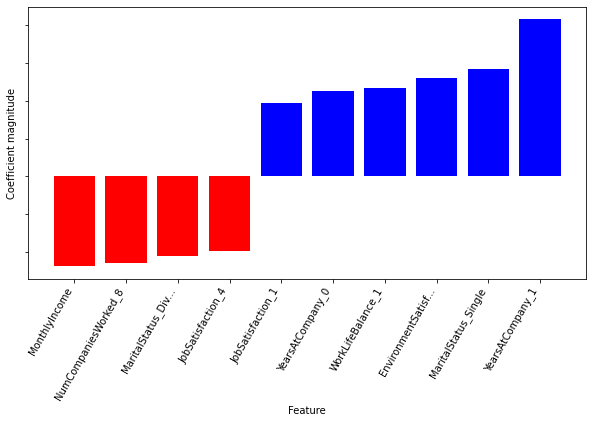

In [9]:
dabl.explain(bc)

In [10]:
# knowing datatypes
emp_df.dtypes

Age                         int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
Attrition                  object
dtype: object

### observation:
pure int dtypes: Age, DistanceFromHome, MonthlyIncome, NumCompaniesWorked, YearsAtCompany
<br>ordinal dtypes: Education, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
<br>object dtypes: Department, EducationField, MaritalStatus
<br>target variable: Attrition

In [11]:
emp_df.columns

Index(['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance',
       'YearsAtCompany', 'Attrition'],
      dtype='object')

In [12]:
# ordinal features
ordinal_var=['Education','EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance']

Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
<br>EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
<br>WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;

In [13]:
# value counts of ordinal variables
for col in emp_df[ordinal_var]:
    print(emp_df[col].value_counts())
    print('-'*75)

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
---------------------------------------------------------------------------
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
---------------------------------------------------------------------------
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
---------------------------------------------------------------------------
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64
---------------------------------------------------------------------------


In [14]:
# categorical features
categorical_var=['Department','EducationField','MaritalStatus']

In [15]:
# value counts of categorical variables
for col in emp_df[categorical_var]:
    print(emp_df[col].value_counts())
    print('-'*75)

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---------------------------------------------------------------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
---------------------------------------------------------------------------
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
---------------------------------------------------------------------------


In [16]:
# target variable value counts
emp_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
# lets check the correlation
emp_df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


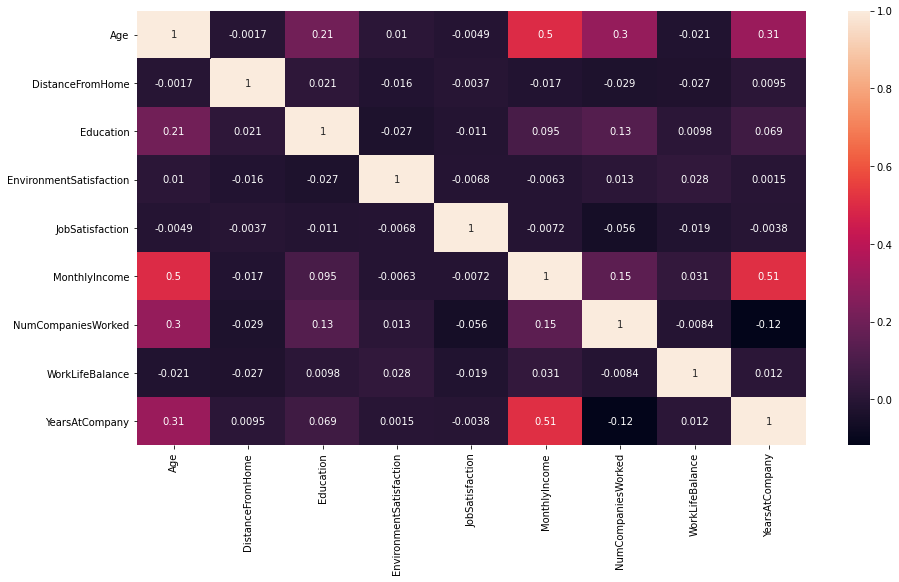

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(emp_df.corr(),annot=True)

In [19]:
# function to encode categorical variables
def Encode(df,variable):
    encoded_Variable = df[variable].value_counts().to_dict()
    df[variable] = df[variable].map(encoded_Variable)

In [20]:
for col in emp_df[categorical_var]:
    Encode(emp_df,col)

In [21]:
# lets encode y output
label_map={'Yes': 1, 'No': 0}
emp_df['Attrition']=emp_df['Attrition'].map(label_map)

In [22]:
emp_df.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition
0,41,446,1,2,606,2,4,470,5993,8,1,6,1
1,49,961,8,1,606,3,2,673,5130,1,3,10,0
2,37,961,2,2,82,4,3,470,2090,6,3,0,1
3,33,961,3,4,606,4,3,673,2909,1,3,8,0
4,27,961,2,1,464,1,2,673,3468,9,3,2,0


In [23]:
emp_df.to_csv('processed_emp_data.csv',index=False)